In [1]:
# 텐서플로우 import
import tensorflow as tf

# 1.유틸리티

## 1.1.Matplotlib 커스텀 폰트(한글)

In [2]:
import matplotlib as mpl

def mpl_font_for_korean():
    """Matplot Lib에서 한글을 출력하기 위한 설정
    """
    !wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf

    mpl.font_manager.fontManager.addfont('NanumGothic-Regular.ttf')
    mpl.rc('font', family='NanumGothic')

In [3]:
mpl_font_for_korean()

--2023-04-25 11:18:03--  https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf [following]
--2023-04-25 11:18:03--  https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2054744 (2.0M) [application/octet-stream]
Saving to: ‘NanumGothic-Regular.ttf’

NanumGothic-Regular 100%[===================>]   1.96M  --.-KB/s    in 0.04s   

2023-04-25 11:18:03 (53.8 MB/s) - ‘NanumGothic-R

## 1.2.이미지, 라벨, 확률 표시 보조 함수

In [4]:
import numpy as np

### 이미지 및 클래스 별 확률 표시

틀린 이미지

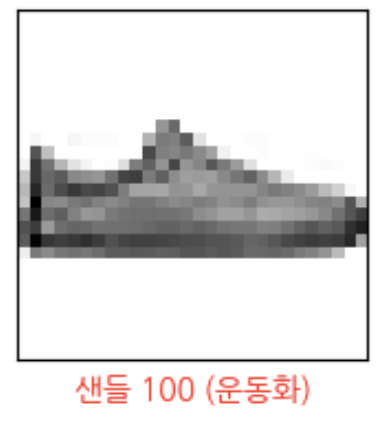

맞는 이미지

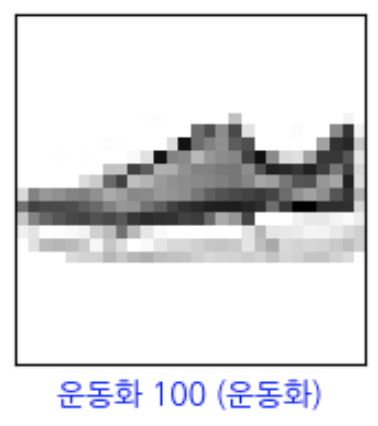

In [5]:
def plot_image(
    predictions_array: np.ndarray, 
    true_label: np.uint8, 
    img: np.ndarray):

    """이미지 및 클래스 별 확률 표시
    
    Parameters
    ----------
    predictions_array : numpy.ndarray
        (n+1, ) 차원의 배열
    true_label : numpy.uint8
        라벨 숫자. n이하여야 한다.
    img : numpy.ndarray
        이미지. 
    """
    # 축 설정
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # 이미지 표시
    plt.imshow(img, cmap=plt.cm.binary)

    # 이미지 라벨 표시
    # 맞으면 파랑, 틀리면 빨강.
    # 예측한 클래스 / 확률 값 (실제 정답)
    # 셔츠 80 (앵클부츠), 바지 90 (바지)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} " +
        f"{100*np.max(predictions_array):2.0f} " +
        f"({class_names[true_label]})", 
        color=color)


### 값에 해당하는 확률 표시

틀린 확률

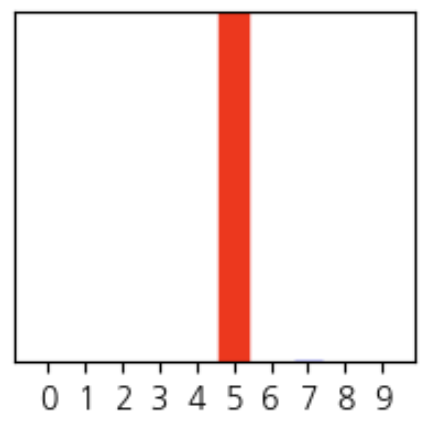

맞은 확률

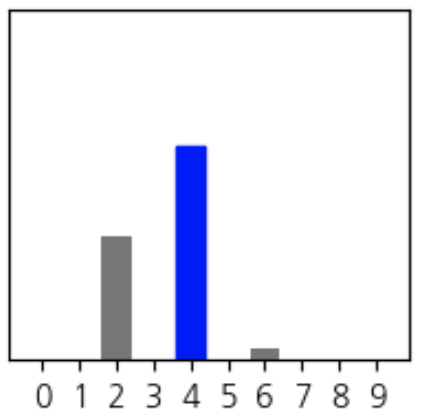

In [6]:
def plot_value_array(
    predictions_array: np.ndarray, 
    true_label: np.uint8):
    """값에 해당하는 확률 표시

    Parameters
    ----------
    predictions_array : numpy.ndarray
        (n+1, ) 차원의 배열
    true_label : numpy.uint8
        라벨 숫자. n이하여야 한다.
    """
    number_of_labels = predictions_array.shape[0]
    # 축 설정
    plt.grid(False)
    plt.xticks(range(number_of_labels))
    plt.yticks([])
    plt.ylim([0, 1])

    # 확률 값 plot
    thisplot = plt.bar(range(number_of_labels), predictions_array, color="#777777")
    predicted_label = np.argmax(predictions_array)

    # 색상 설정
    # 답을 맞게 예측했으면 파랑, 틀리게 예측했으면 빨강
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 이미지 / 확률 한꺼번에 표시

예시 이미지. 실제로는 기본 줄 5, 칸 3에 해당하는 이미지가 플롯됩니다.

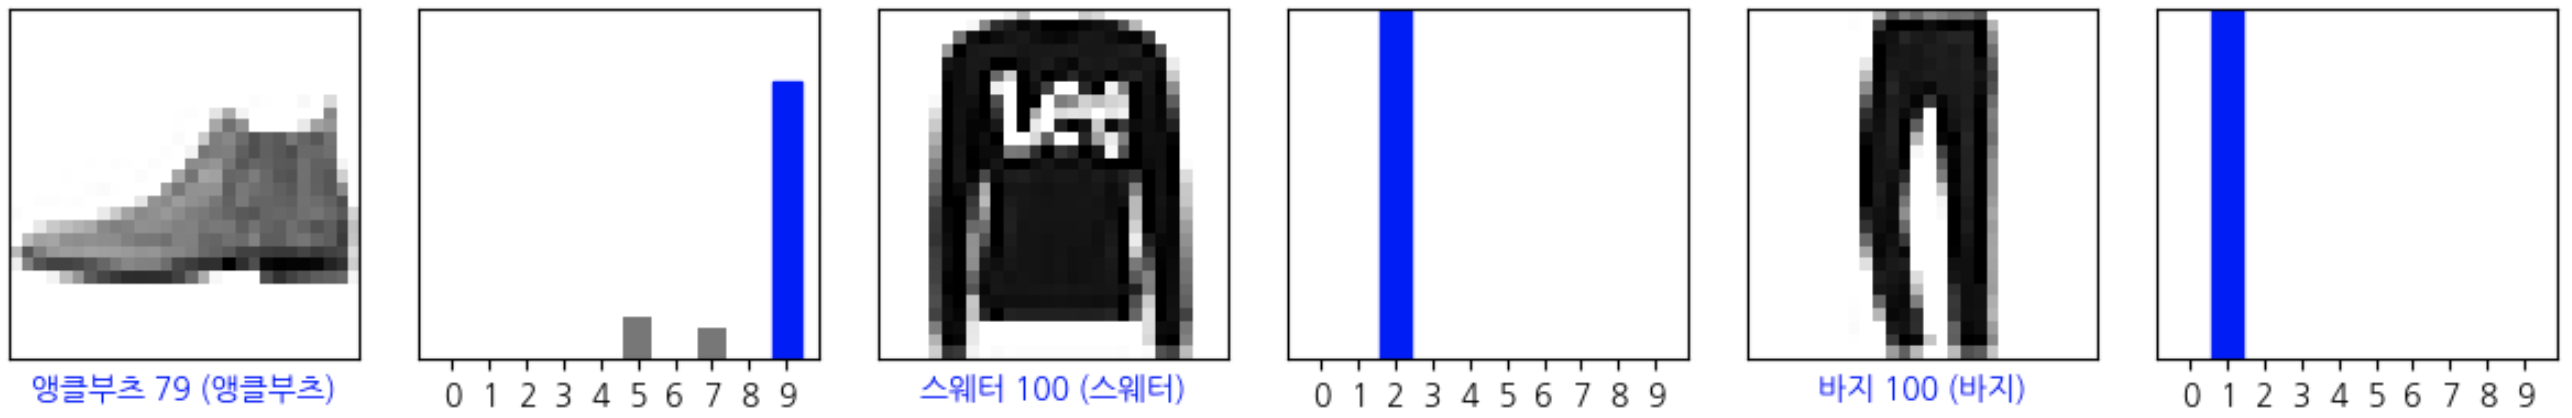

In [7]:
def plot_image_predicted_results(
    predicted_results: np.ndarray, 
    predicted_inputs: np.ndarray,
    true_labels: np.ndarray,
    num_rows: int = 5,
    num_cols: int = 3):
    """값에 해당하는 확률 표시

    Parameters
    ----------
    predicted_results : numpy.ndarray
        (num_of_inputs, n+1) 차원의 배열.
    predicted_inputs : numpy.ndarray
        (num_of_inputs, image_width, image_height) 이미지들.
    true_labels : np.ndarray
        (num_of_inputs, ) 라벨 숫자. n이하여야 한다.
    num_rows : int, default=5
        행의 수.
    num_cols : int, default=3
        열의 수.
    """
    # 그래프 영역 설정
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
    # 내부 플롯
    for i in range(num_images):
        # 이미지 플롯
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(predicted_results[i], true_labels[i], predicted_inputs[i])
        # 값-확률 플롯
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(predicted_results[i], true_labels[i])
    
    # 그래프 플롯
    plt.tight_layout()
    plt.show()

## 1.3.이미지 표시

In [8]:
import matplotlib.pyplot as plt
import numpy as np

### 단일 이미지 플롯

In [9]:
def plot_gray_image(image: np.ndarray):
    """흑백 이미지 플롯

    image : np.ndarray
        (image_width, image_height)의 이미지
    """
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary.reversed())
    plt.colorbar()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

### 한꺼번에 보기

In [10]:
def plot_multiple_images(images: np.ndarray, labels: np.ndarray, class_names: list):
    """여러 이미지 및 라벨 플롯

    images : np.ndarray
        (num_of_inputs, image_width, image_height)의 이미지
    labels : np.ndarray
        (num_of_inputs, ) 라벨 숫자.
    class_names : list
        라벨 이름.
    """
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"{class_names[labels[i]]} ({labels[i]})")
    plt.show()

# 2.데이터 세트

## 2.1.Fashion MNIST

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
print(f"트레이닝 이미지 shape: {train_images.shape}, dtype: {train_images.dtype}")
print(f"트레이닝 라벨 shape: {train_labels.shape}, dtype: {train_labels.dtype}")
print(f"테스트 이미지 shape: {test_images.shape}, dtype: {test_images.dtype}")
print(f"테스트 라벨 shape: {test_labels.shape}, dtype: {test_labels.dtype}")

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8
테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [13]:
class_names = ['티셔츠/상의', '바지', '스웨터', '드레스', '코트',
               '샌들', '셔츠', '운동화', '가방', '앵클부츠']

### 이미지

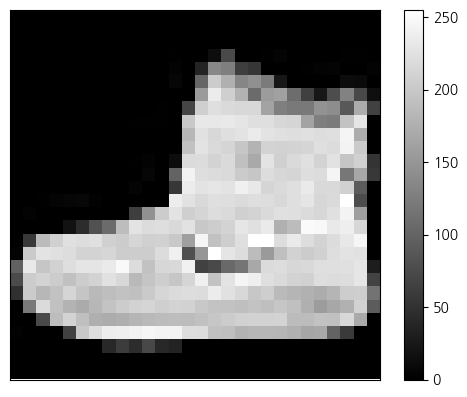

In [14]:
plot_gray_image(train_images[0])

### 라벨

In [15]:
train_labels[0]

9

### 한꺼번에 보기

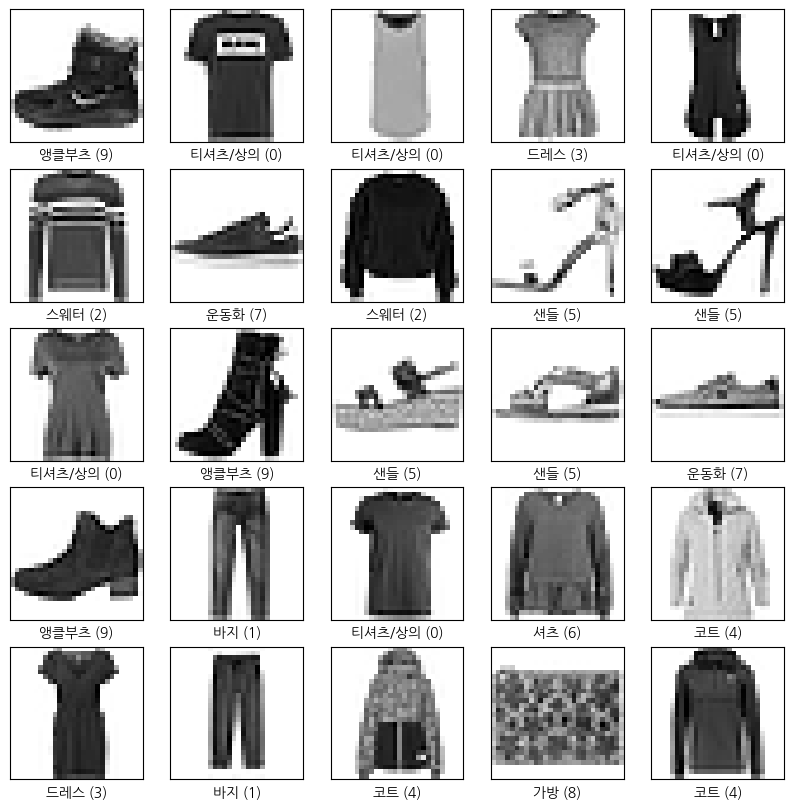

In [16]:
plot_multiple_images(train_images, train_labels, class_names)

## 2.2.전처리

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 3.간단한 분류기

## 3.1.모델 1

### 모델

In [ ]:
def mnist_model(image_size=(28, 28)):
    input_1 = tf.keras.layers.Input(image_size, name="input_layer_1")
    flatten_1 = tf.keras.layers.Flatten(name="flatten_layer_1")(input_1)
    dense_1 = tf.keras.layers.Dense(10, name="dense_layer_1")(flatten_1)
    softmax_1 = tf.keras.layers.Softmax(name="softmax_layer_1")(dense_1)

    return tf.keras.models.Model(inputs=[input_1], outputs=[softmax_1])

In [ ]:
model_1 = mnist_model()

In [ ]:
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [ ]:
history_1 = model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6021 - accuracy: 0.7972
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4628 - accuracy: 0.8415
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4369 - accuracy: 0.8492
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8535
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4136 - accuracy: 0.8577
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4074 - accuracy: 0.8592
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4024 - accuracy: 0.8598
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3986 - accuracy: 0.8609
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8625
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.392

## 3.2.모델 2

### 모델

In [ ]:
def mnist_model2(image_size=(28, 28)):
    input_1 = tf.keras.layers.Input(image_size, name="input_layer_1")
    flatten_1 = tf.keras.layers.Flatten(name="flatten_layer_1")(input_1)
    dense_1 = tf.keras.layers.Dense(128, name="dense_layer_1")(flatten_1)
    dense_2 = tf.keras.layers.Dense(10, name="dense_layer_2")(dense_1)
    softmax_1 = tf.keras.layers.Softmax(name="softmax_layer_1")(dense_2)

    return tf.keras.models.Model(inputs=[input_1], outputs=[softmax_1])

In [ ]:
model_2 = mnist_model2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (InputLayer)  [(None, 28, 28)]          0         
                                                                 
 flatten_layer_1 (Flatten)   (None, 784)               0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 10)                1290      
                                                                 
 softmax_layer_1 (Softmax)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [ ]:
history_2 = model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5342 - accuracy: 0.8162
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4578 - accuracy: 0.8404
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4387 - accuracy: 0.8468
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4294 - accuracy: 0.8490
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4214 - accuracy: 0.8528
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4186 - accuracy: 0.8528
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8543
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4107 - accuracy: 0.8566
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4079 - accuracy: 0.8568
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.403

## 3.3.모델 2-1

### 모델

In [ ]:
def mnist_model2_1(image_size=(28, 28)):
    input_1 = tf.keras.layers.Input(image_size, name="input_layer_1")
    flatten_1 = tf.keras.layers.Flatten(name="flatten_layer_1")(input_1)
    dense_1 = tf.keras.layers.Dense(128, name="dense_layer_1")(flatten_1)
    relu_1 = tf.keras.layers.ReLU(name="relu_1")(dense_1)
    dense_2 = tf.keras.layers.Dense(10, name="dense_layer_2")(relu_1)
    softmax_1 = tf.keras.layers.Softmax(name="softmax_layer_1")(dense_2)

    return tf.keras.models.Model(inputs=[input_1], outputs=[softmax_1])

In [ ]:
model_2_1 = mnist_model2_1()
model_2_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (InputLayer)  [(None, 28, 28)]          0         
                                                                 
 flatten_layer_1 (Flatten)   (None, 784)               0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               100480    
                                                                 
 relu_1 (ReLU)               (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 10)                1290      
                                                                 
 softmax_layer_1 (Softmax)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainab

In [ ]:
model_2_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 트레이닝

In [ ]:
history_2_1 = model_2_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3351 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3109 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2540 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2460 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

## 3.4.모델 3

### 모델

In [18]:
layers = tf.keras.layers
models = tf.keras.models

In [44]:
def mnist_model3(image_size=(28, 28, 1)):
    input_1 = layers.Input(image_size)

    block_1 = layers.Conv2D(
        6, 3, activation="relu",
        padding="same",
        name="block_1-conv_1"
    )(input_1)
    block_1 = layers.Conv2D(
        6, 3, activation="relu",
        padding="same",
        name="block_1-conv_2"
    )(block_1)
    block_1 = layers.MaxPool2D(
        2, 2,
        name="block_1-pool_1"
    )(block_1)

    block_2 = layers.Conv2D(
        16, 3, activation="relu",
        padding="same",
        name="block_2-conv_1"
    )(block_1)
    block_2 = layers.Conv2D(
        16, 3, activation="relu",
        padding="same",
        name="block_2-conv_2"
    )(block_2)
    block_2 = layers.MaxPool2D(
        2, 2,
        name="block_2-pool_1"
    )(block_2)
    
    
    flatten_1 = layers.Flatten()(block_2)
    dense_1 = layers.Dense(
        120, activation="relu"
    )(flatten_1)
    dense_2 = layers.Dense(
        84, activation="relu"
    )(dense_1)
    dense_3 = layers.Dense(
        10, activation="softmax"
    )(dense_2)

    return models.Model(
        inputs=[input_1],
        outputs=[dense_3]
    )

In [45]:
model_3 = mnist_model3()
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 block_1-conv_1 (Conv2D)     (None, 28, 28, 6)         60        
                                                                 
 block_1-conv_2 (Conv2D)     (None, 28, 28, 6)         330       
                                                                 
 block_1-pool_1 (MaxPooling2  (None, 14, 14, 6)        0         
 D)                                                              
                                                                 
 block_2-conv_1 (Conv2D)     (None, 14, 14, 16)        880       
                                                                 
 block_2-conv_2 (Conv2D)     (None, 14, 14, 16)        2320      
                                                             

In [47]:
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

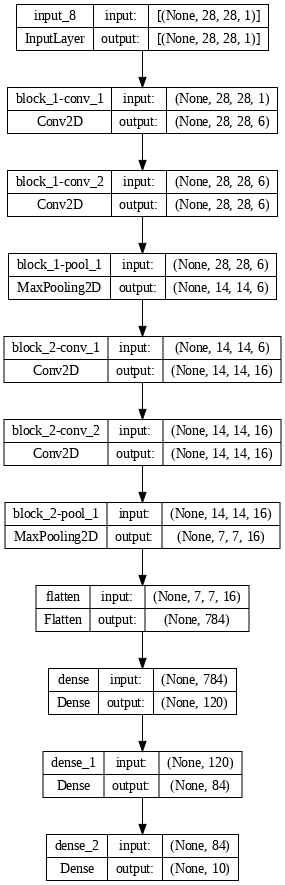

In [48]:
from keras.utils import plot_model

plot_model(
    model_3, show_shapes=True,
    to_file='model_3.png',
    expand_nested=True, dpi=72
)

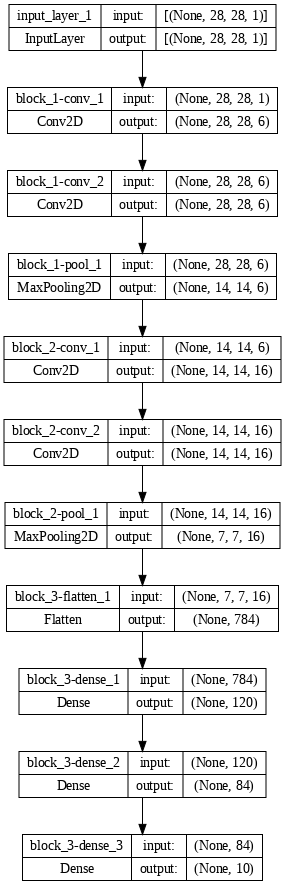

### 트레이닝

In [49]:
history_3 = model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.4629 - accuracy: 0.8306
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2471 - accuracy: 0.9090
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2167 - accuracy: 0.9190
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1951 - accuracy: 0.9269
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1777 - accuracy: 0.9330
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1607 - accuracy: 0.9398
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1450 - accuracy: 0.9463
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1312 - accuracy: 0.9505
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.11

# 4.결과 정리

## 4.1.모델1

### 테스트

In [ ]:
model_1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8422


[0.4498683512210846, 0.842199981212616]

### 예측

In [ ]:
predictions_1 = model_1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


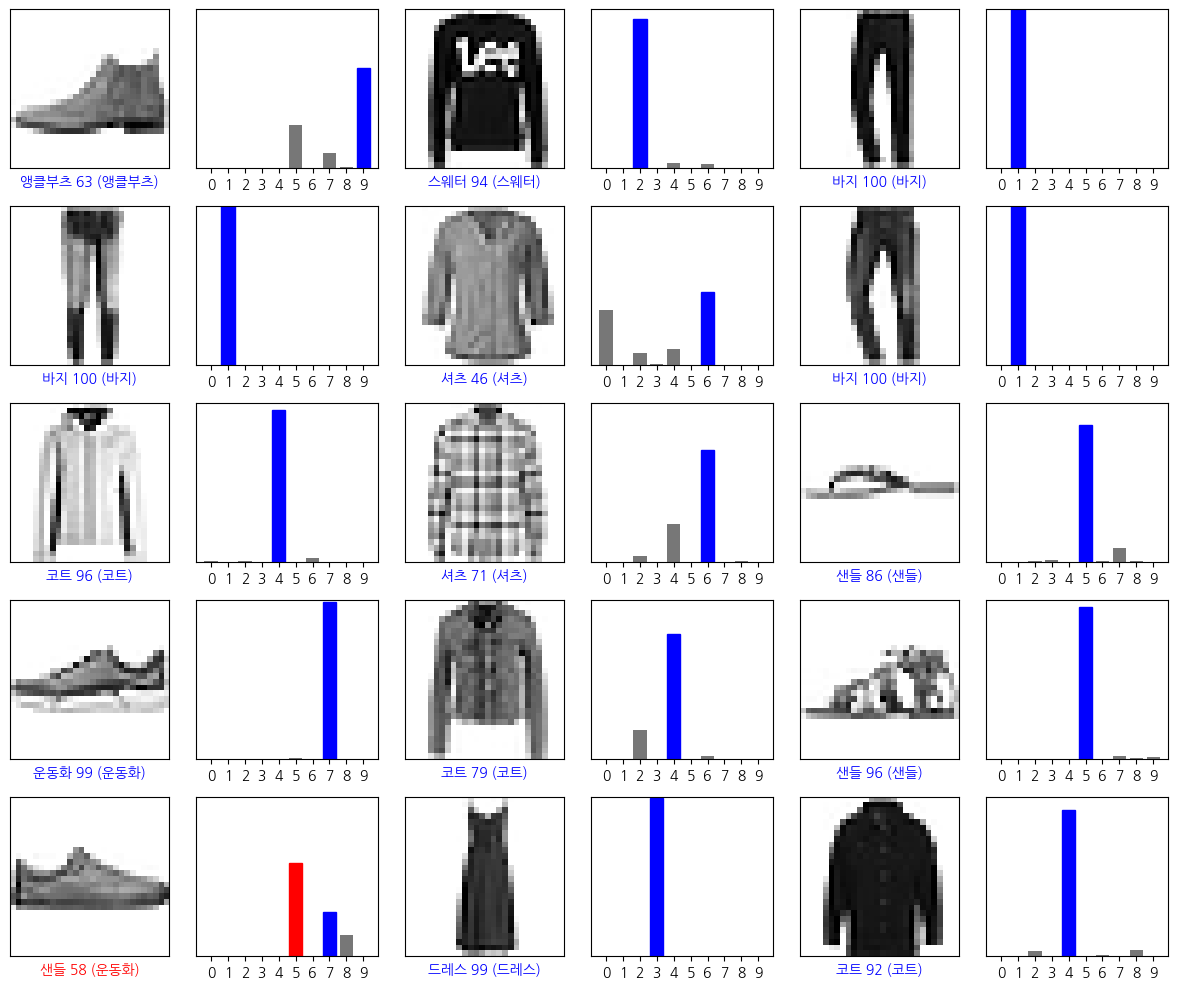

In [ ]:
plot_image_predicted_results(
    predictions_1,
    test_images,
    test_labels
)

## 4.2.모델 2

### 테스트

In [ ]:
model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.8283


[0.4705691337585449, 0.8282999992370605]

### 예측

In [ ]:
predictions_2 = model_2.predict(test_images)

313/313 [==============================] - 1s 3ms/step


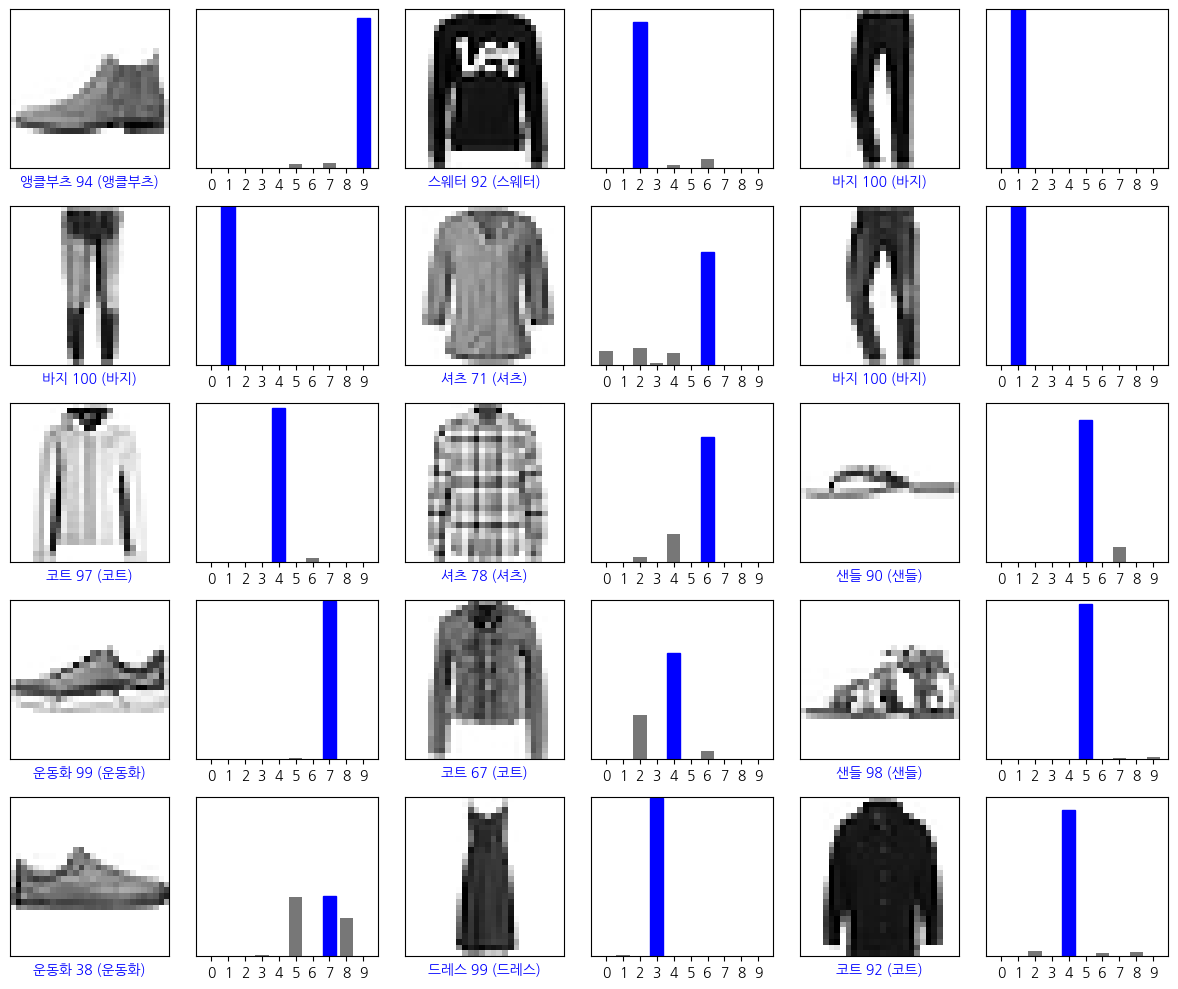

In [ ]:
plot_image_predicted_results(
    predictions_2,
    test_images,
    test_labels
)

## 4.3.모델 2-1

### 테스트

In [ ]:
model_2_1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8838


[0.3316417634487152, 0.8838000297546387]

### 예측

In [ ]:
predictions_2_1 = model_2_1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


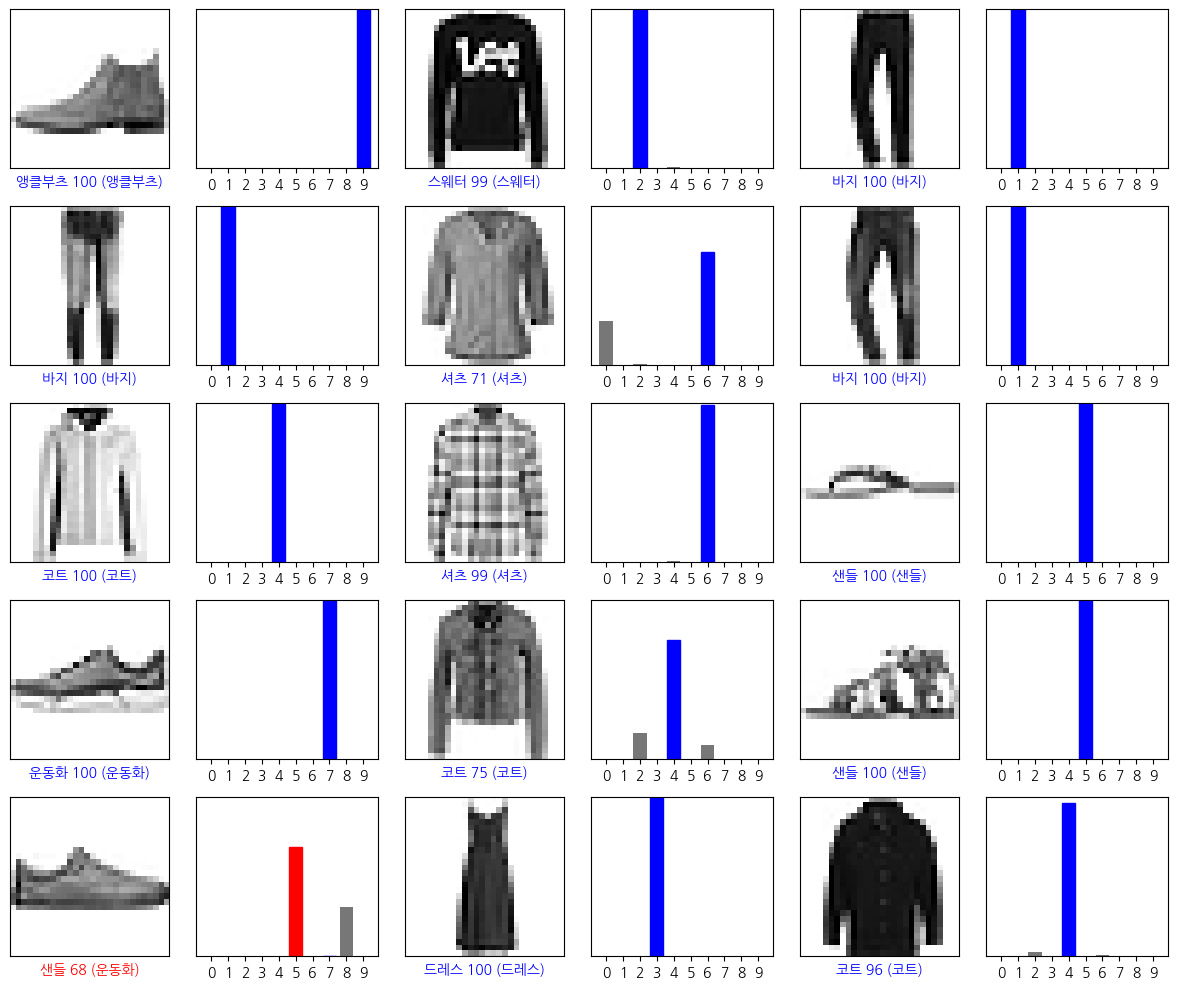

In [ ]:
plot_image_predicted_results(
    predictions_2_1,
    test_images,
    test_labels
)

## 4.4.모델 3

### 테스트

In [50]:
model_3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.9145


[0.2745825946331024, 0.9144999980926514]

### 예측

313/313 [==============================] - 1s 2ms/step


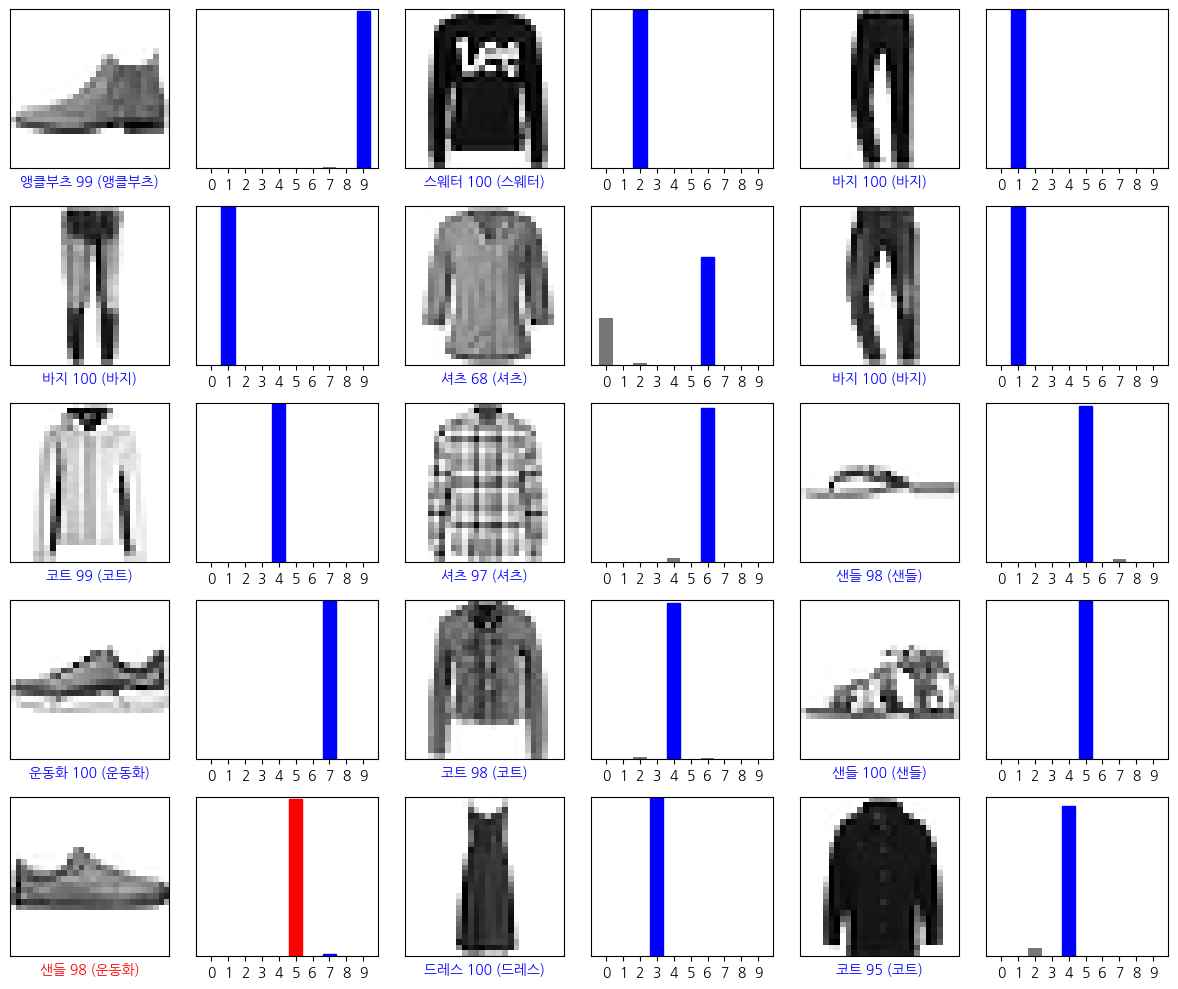